In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import geocoder
from uber_rides.session import Session
from uber_rides.client import UberRidesClient

Análise de dados de preço do Uber em Campina Grande-PB

In [2]:
bairros = pd.read_csv("Bairros.csv", encoding='latin-1')

In [3]:
bairros

,Bairros
0,Alto Branco
1,Alto da Serra
2,Araxá
3,Bairro das Nações
4,Conceição
5,Cuités
6,Distrito de Jenipapo (dividido entre Campina G...
7,Jardim Continental
8,Jardim Menezes
9,Jardim Tavares


In [4]:
lat, long = [], []
for i in bairros['Bairros']:
    g = geocoder.arcgis(i + ', Campina Grande, paraiba')
    lat.append(g.lat)
    
    long.append(g.lng)

Mapa com pontos que marcam onde se localizam os bairros de Campina Grande

In [5]:
a = plt.scatter(long, lat, marker='.')
mplleaflet.display()

In [6]:
session = Session(server_token='nskNWfhogB13VV2kzHjmmpu-2BloJgXqwDQ3h6aR')
client = UberRidesClient(session)

In [7]:
response = client.get_products(lat[0], long[0])
products = response.json.get('products')

In [8]:
resp = client.get_price_estimates(start_latitude=lat[0], start_longitude=long[0], 
                                  end_latitude=lat[0], end_longitude=long[0], seat_count=2)
estimate = resp.json.get('prices')

In [9]:
pontos = [[lat[x], long[x]] for x in range(len(lat))]
price = []

In [10]:
data_b = pd.DataFrame(pontos)
data_b.to_csv('Pontos dos bairros.csv')

In [11]:
tab_precos = []
tabela = []
precos = []

In [13]:
for i in range(89, 90):
    for j in range(len(pontos)):
        if(i != j):
            resp = client.get_price_estimates(start_latitude=pontos[i][0], 
                                          start_longitude=pontos[i][1], 
                                          end_latitude=pontos[j][0], 
                                          end_longitude=pontos[j][1], 
                                          seat_count=2)
            estimate = resp.json.get('prices')[0]['estimate']
            tabela.append(estimate)
            precos = pd.DataFrame(tabela, columns=[str(bairros['Bairros'][i])])
            precos.to_csv('Preco Corridas.csv')
    tabela = []

Arquivo com os preços estimados de viajens de Uber com análises de um domingo pela tarde. Os preços estão tabelados com todas as rotas entres os bairros da cidade de Campina Grande.

In [16]:
tab = pd.read_csv('Preco de todos os bairros em CG.csv', encoding='latin-1')
tab

,Bairros,Alto Branco,Alto da Serra,Araxá,Bairro das Nações,Conceição,Cuités,Distrito de Jenipapo (dividido entre Campina Grande Lagoa Seca e Puxinanã),Jardim Continental,Jardim Menezes,...,Pedregal,Prata,Ramadinha,Santa Cruz,Santa Rosa,São Januário,Serrotão,Sítio Lucas,Sítio Estreito,Universitário
0,Alto Branco,NaN,R$7-10,R$9-12,R$6-8,R$6-8,R$6-9,R$9-13,R$6-8,R$16-21,...,R$8-10,R$6-8,R$17-22,R$17-21,R$11-15,R$13-17,R$13-17,R$6-8,R$6-8,R$12-16
1,Alto da Serra,R$10-13,NaN,R$7-9,R$11-15,R$6-9,R$8-11,R$9-13,R$10-13,R$13-17,...,R$6-9,R$6-8,R$16-21,R$9-12,R$8-11,R$13-17,R$13-17,R$11-14,R$6-8,R$17-22
2,Araxá,R$7-9,R$11-14,NaN,R$8-10,R$6-9,R$6-8,R$11-15,R$6-9,R$14-18,...,R$6-9,R$6-9,R$10-14,R$18-23,R$13-17,R$8-10,R$8-10,R$6-8,R$8-10,R$10-14
3,Bairro das Nações,R$6-8,R$11-14,R$6-8,NaN,R$6-9,R$6-8,R$12-16,R$6-8,R$23-29,...,R$10-14,R$7-10,R$19-25,R$20-25,R$16-20,R$14-18,R$14-18,R$6-9,R$7-10,R$14-18
4,Conceição,R$6-8,R$6-9,R$6-8,R$6-8,NaN,R$6-8,R$9-13,R$6-9,R$17-22,...,R$7-9,R$6-8,R$15-20,R$14-18,R$10-14,R$12-15,R$12-15,R$6-8,R$6-8,R$12-16
5,Cuités,R$6-9,R$8-11,R$6-9,R$6-8,R$6-8,NaN,R$11-14,R$6-8,R$18-24,...,R$6-9,R$6-8,R$13-17,R$17-22,R$12-16,R$9-13,R$9-13,R$6-8,R$6-9,R$10-14
6,Distrito de Jenipapo (dividido entre Campina G...,R$6-9,R$6-8,R$6-9,R$10-13,R$6-8,R$7-9,NaN,R$7-10,R$12-16,...,R$6-8,R$6-8,R$12-15,R$11-14,R$9-12,R$9-12,R$9-13,R$6-9,R$6-8,R$12-16
7,Jardim Continental,R$6-8,R$8-11,R$6-8,R$6-8,R$6-8,R$6-8,R$11-14,NaN,R$20-25,...,R$7-10,R$6-9,R$15-19,R$18-23,R$14-18,R$11-15,R$11-15,R$6-8,R$7-9,R$12-16
8,Jardim Menezes,R$12-16,R$8-11,R$12-15,R$15-19,R$10-14,R$12-16,R$14-18,R$13-17,NaN,...,R$7-10,R$8-11,R$9-12,R$13-17,R$9-12,R$8-10,R$8-10,R$10-14,R$8-11,R$17-22
9,Jardim Tavares,R$6-8,R$8-11,R$6-8,R$6-8,R$6-8,R$7-9,R$9-13,R$6-9,R$19-25,...,R$8-11,R$6-9,R$18-23,R$17-22,R$14-18,R$14-19,R$15-19,R$7-9,R$6-9,R$15-19


In [20]:
lista_min = []
soma= 0
for i in tab:
    if(i != 'Bairros'):
        soma = 0
        for j in range(len(tab[i])):
            if(type(tab[i][j]) is float):
                pass
            else:
                num = 4
                if(tab[i][j][2:num][1] == '-'):
                    num = 3
                    inteiro = int(tab[i][j][2:num])
                    soma = soma + inteiro
                else:
                    inteiro = int(tab[i][j][2:num])
                    soma = soma + inteiro
    lista_min.append(soma)
print(lista_min)

[0, 757, 635, 761, 898, 775, 764, 1077, 808, 1400, 749, 1067, 966, 944, 685, 808, 1517, 1127, 968, 781, 1107, 625, 965, 1004, 699, 716, 774, 770, 902, 1105, 778, 811, 813, 1122, 967, 871, 1125, 3078, 978, 1275, 622, 790, 1065, 1138, 881, 797, 947, 1255, 931, 865, 627, 861, 989, 639, 762, 1141, 894, 809, 1098, 966, 1006, 612, 763, 1465, 1353, 1059, 973, 1110, 779, 731, 731, 1166, 1211, 977, 604, 607, 696, 658, 798, 1307, 963, 654, 611, 1349, 1132, 876, 1022, 1054, 839, 608, 1324]


In [22]:
valor = [757, 635, 761, 898, 775, 764, 1077, 808, 1400, 749, 1067, 966, 944, 685, 808, 1517, 1127, 968, 781, 
                   1107, 625, 965, 1004, 699, 716, 774, 770, 902, 1105, 778, 811, 813, 1122, 967, 871, 1125, 3078, 978, 1275, 622, 790, 1065, 1138, 881, 797, 947, 1255, 931, 865, 627, 861, 989, 639, 762, 1141, 894, 809, 1098, 966, 1006, 612, 763, 1465, 1353, 1059, 973, 1110, 779, 731, 731, 1166, 1211, 977, 604, 607, 696, 658, 798, 1307, 963, 654, 611, 1349, 1132, 
                   876, 1022, 1054, 839, 608]

Tabela com os preços minímo total, em reais, de viagens entre todos os bairros. Mostrando quais bairros procorcionaram viajens mais baratas

In [24]:
valores = pd.DataFrame({'Bairros': tab['Bairros'][1:90], 'Valor Viajem': valor})

Foi dividido em duas tabela para que os gráficos tenham uma leitura mais facilitada, pois são muitos bairros.

In [26]:
valores_par1 = pd.DataFrame({'Bairros': tab['Bairros'][1:46], 'Valor Viajem': valor[0:45]})
valores_par1

,Bairros,Valor Viajem
1,Alto da Serra,757
2,Araxá,635
3,Bairro das Nações,761
4,Conceição,898
5,Cuités,775
6,Distrito de Jenipapo (dividido entre Campina G...,764
7,Jardim Continental,1077
8,Jardim Menezes,808
9,Jardim Tavares,1400
10,Jeremias,749


<BarContainer object of 45 artists>

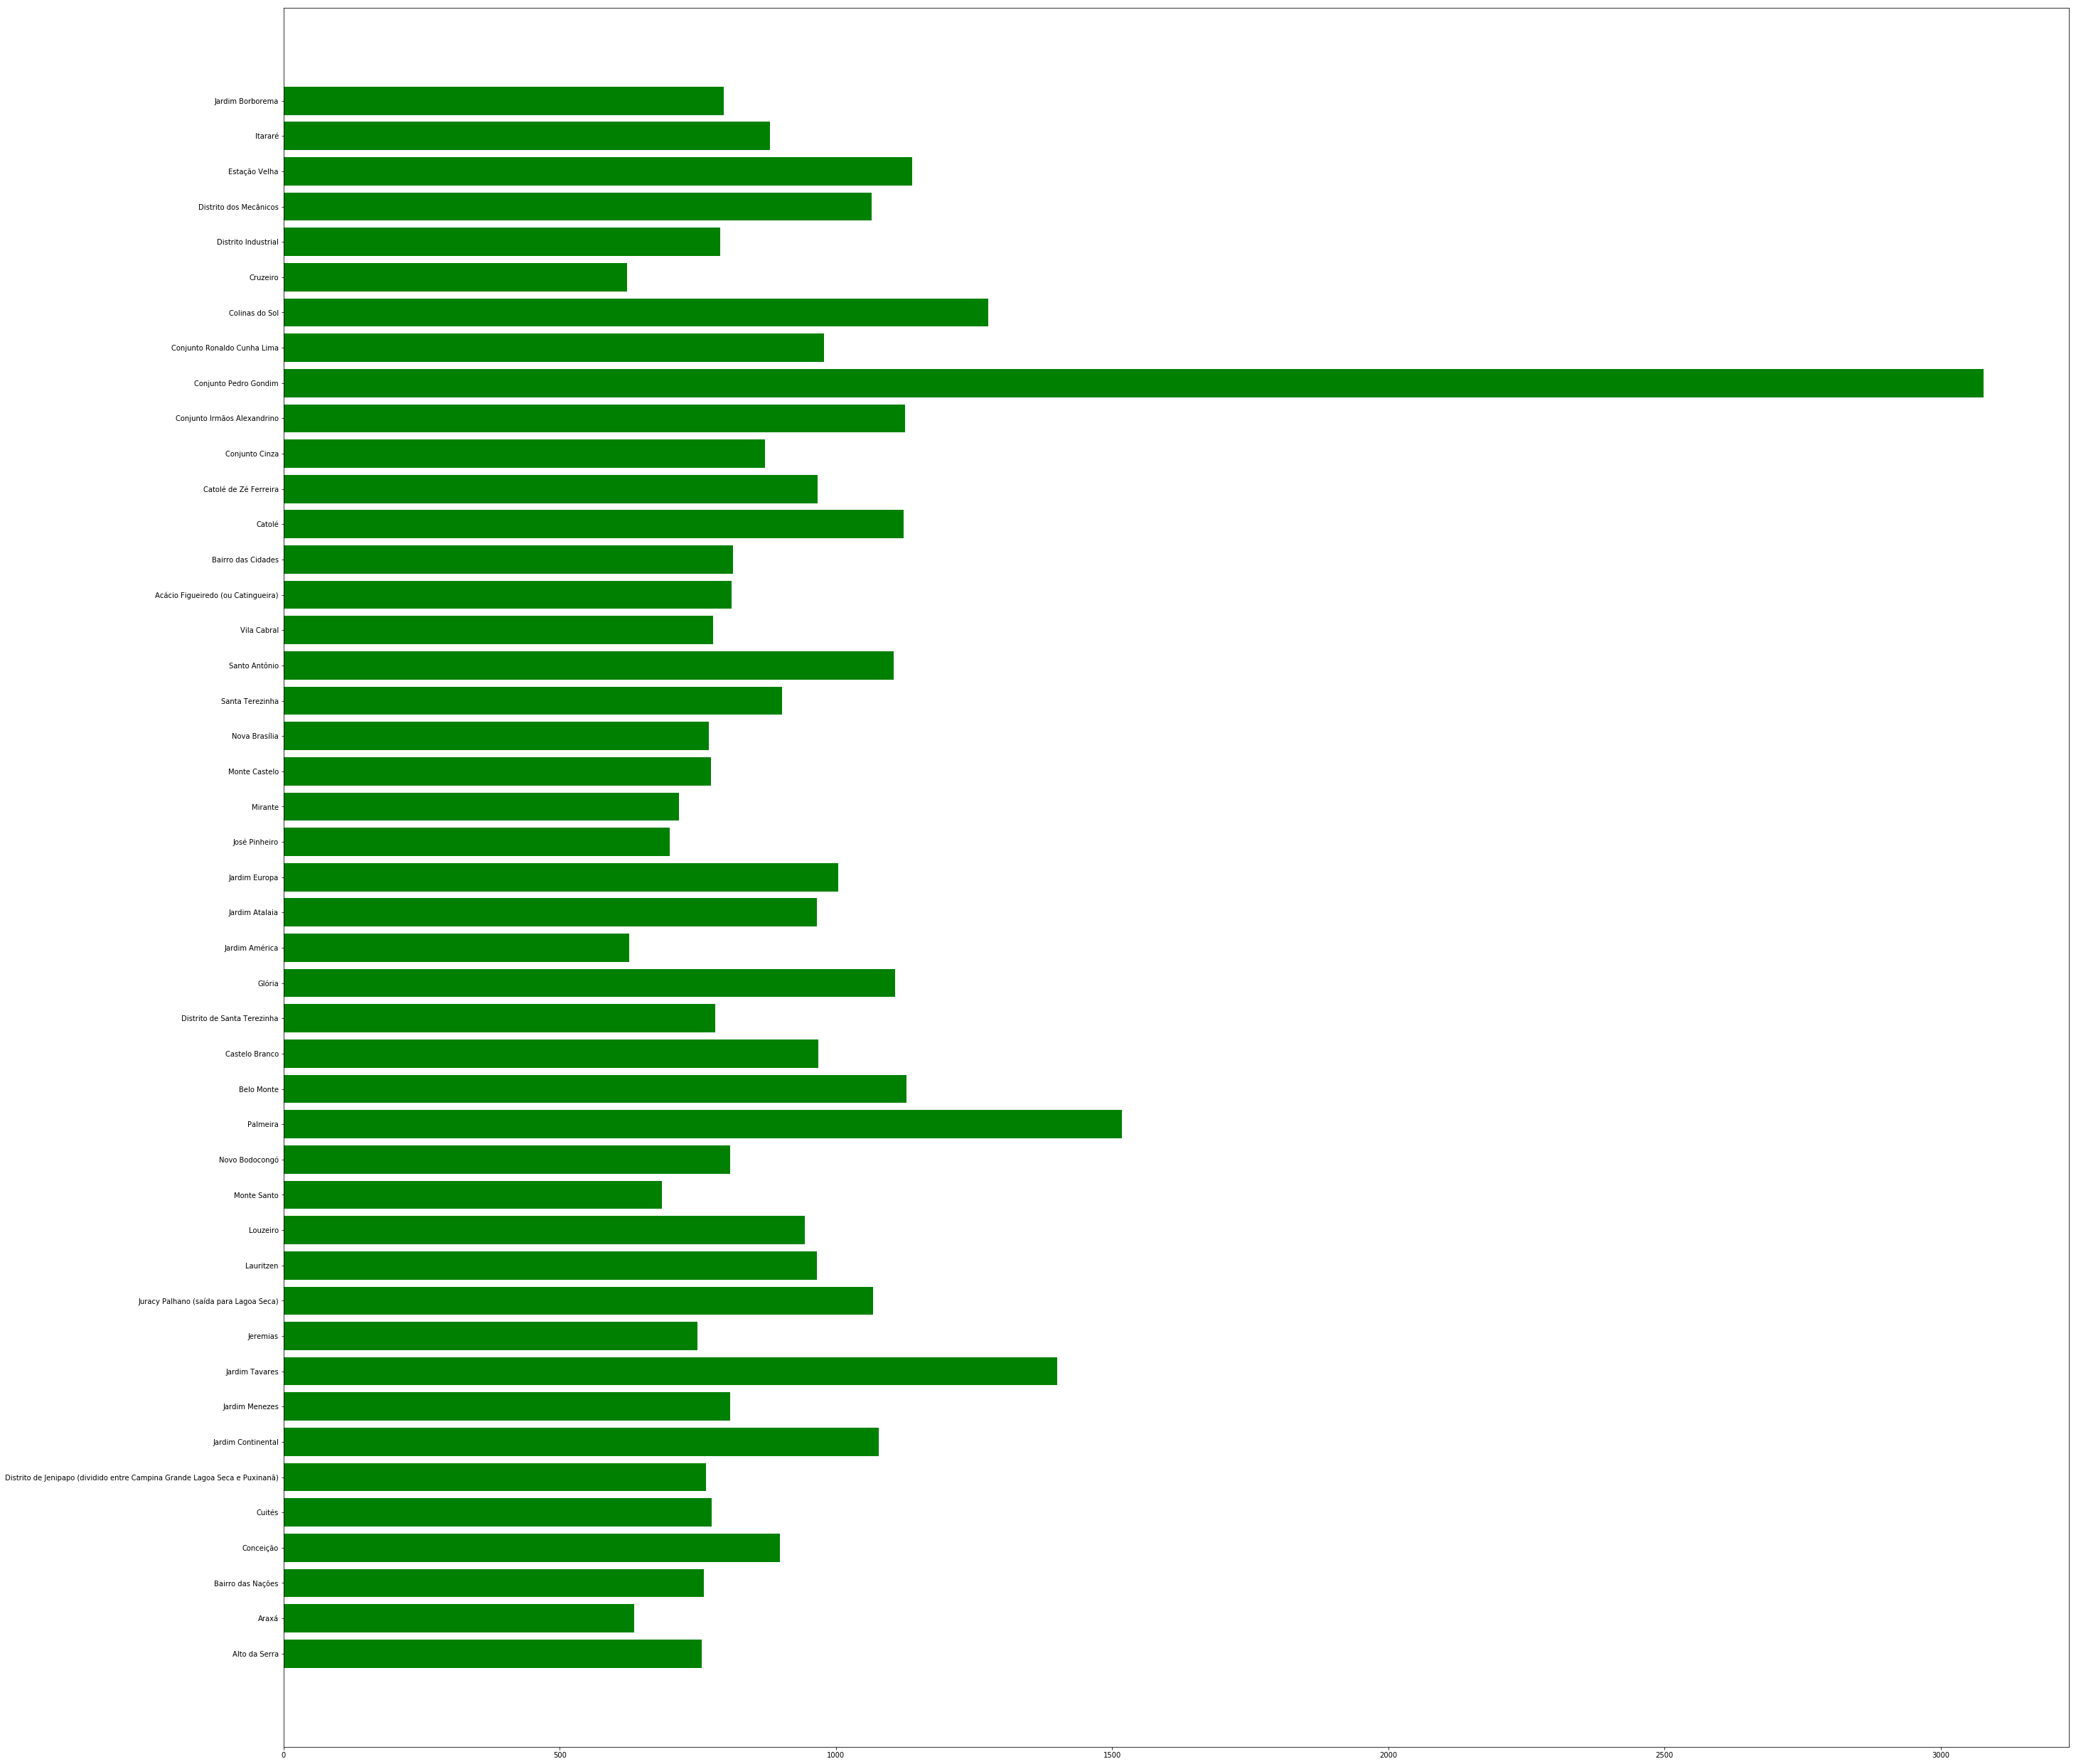

In [28]:
plt.figure(figsize=(45, 45))
plt.barh(valores_par1['Bairros'], valores_par1['Valor Viajem'], color = 'green')

<BarContainer object of 44 artists>

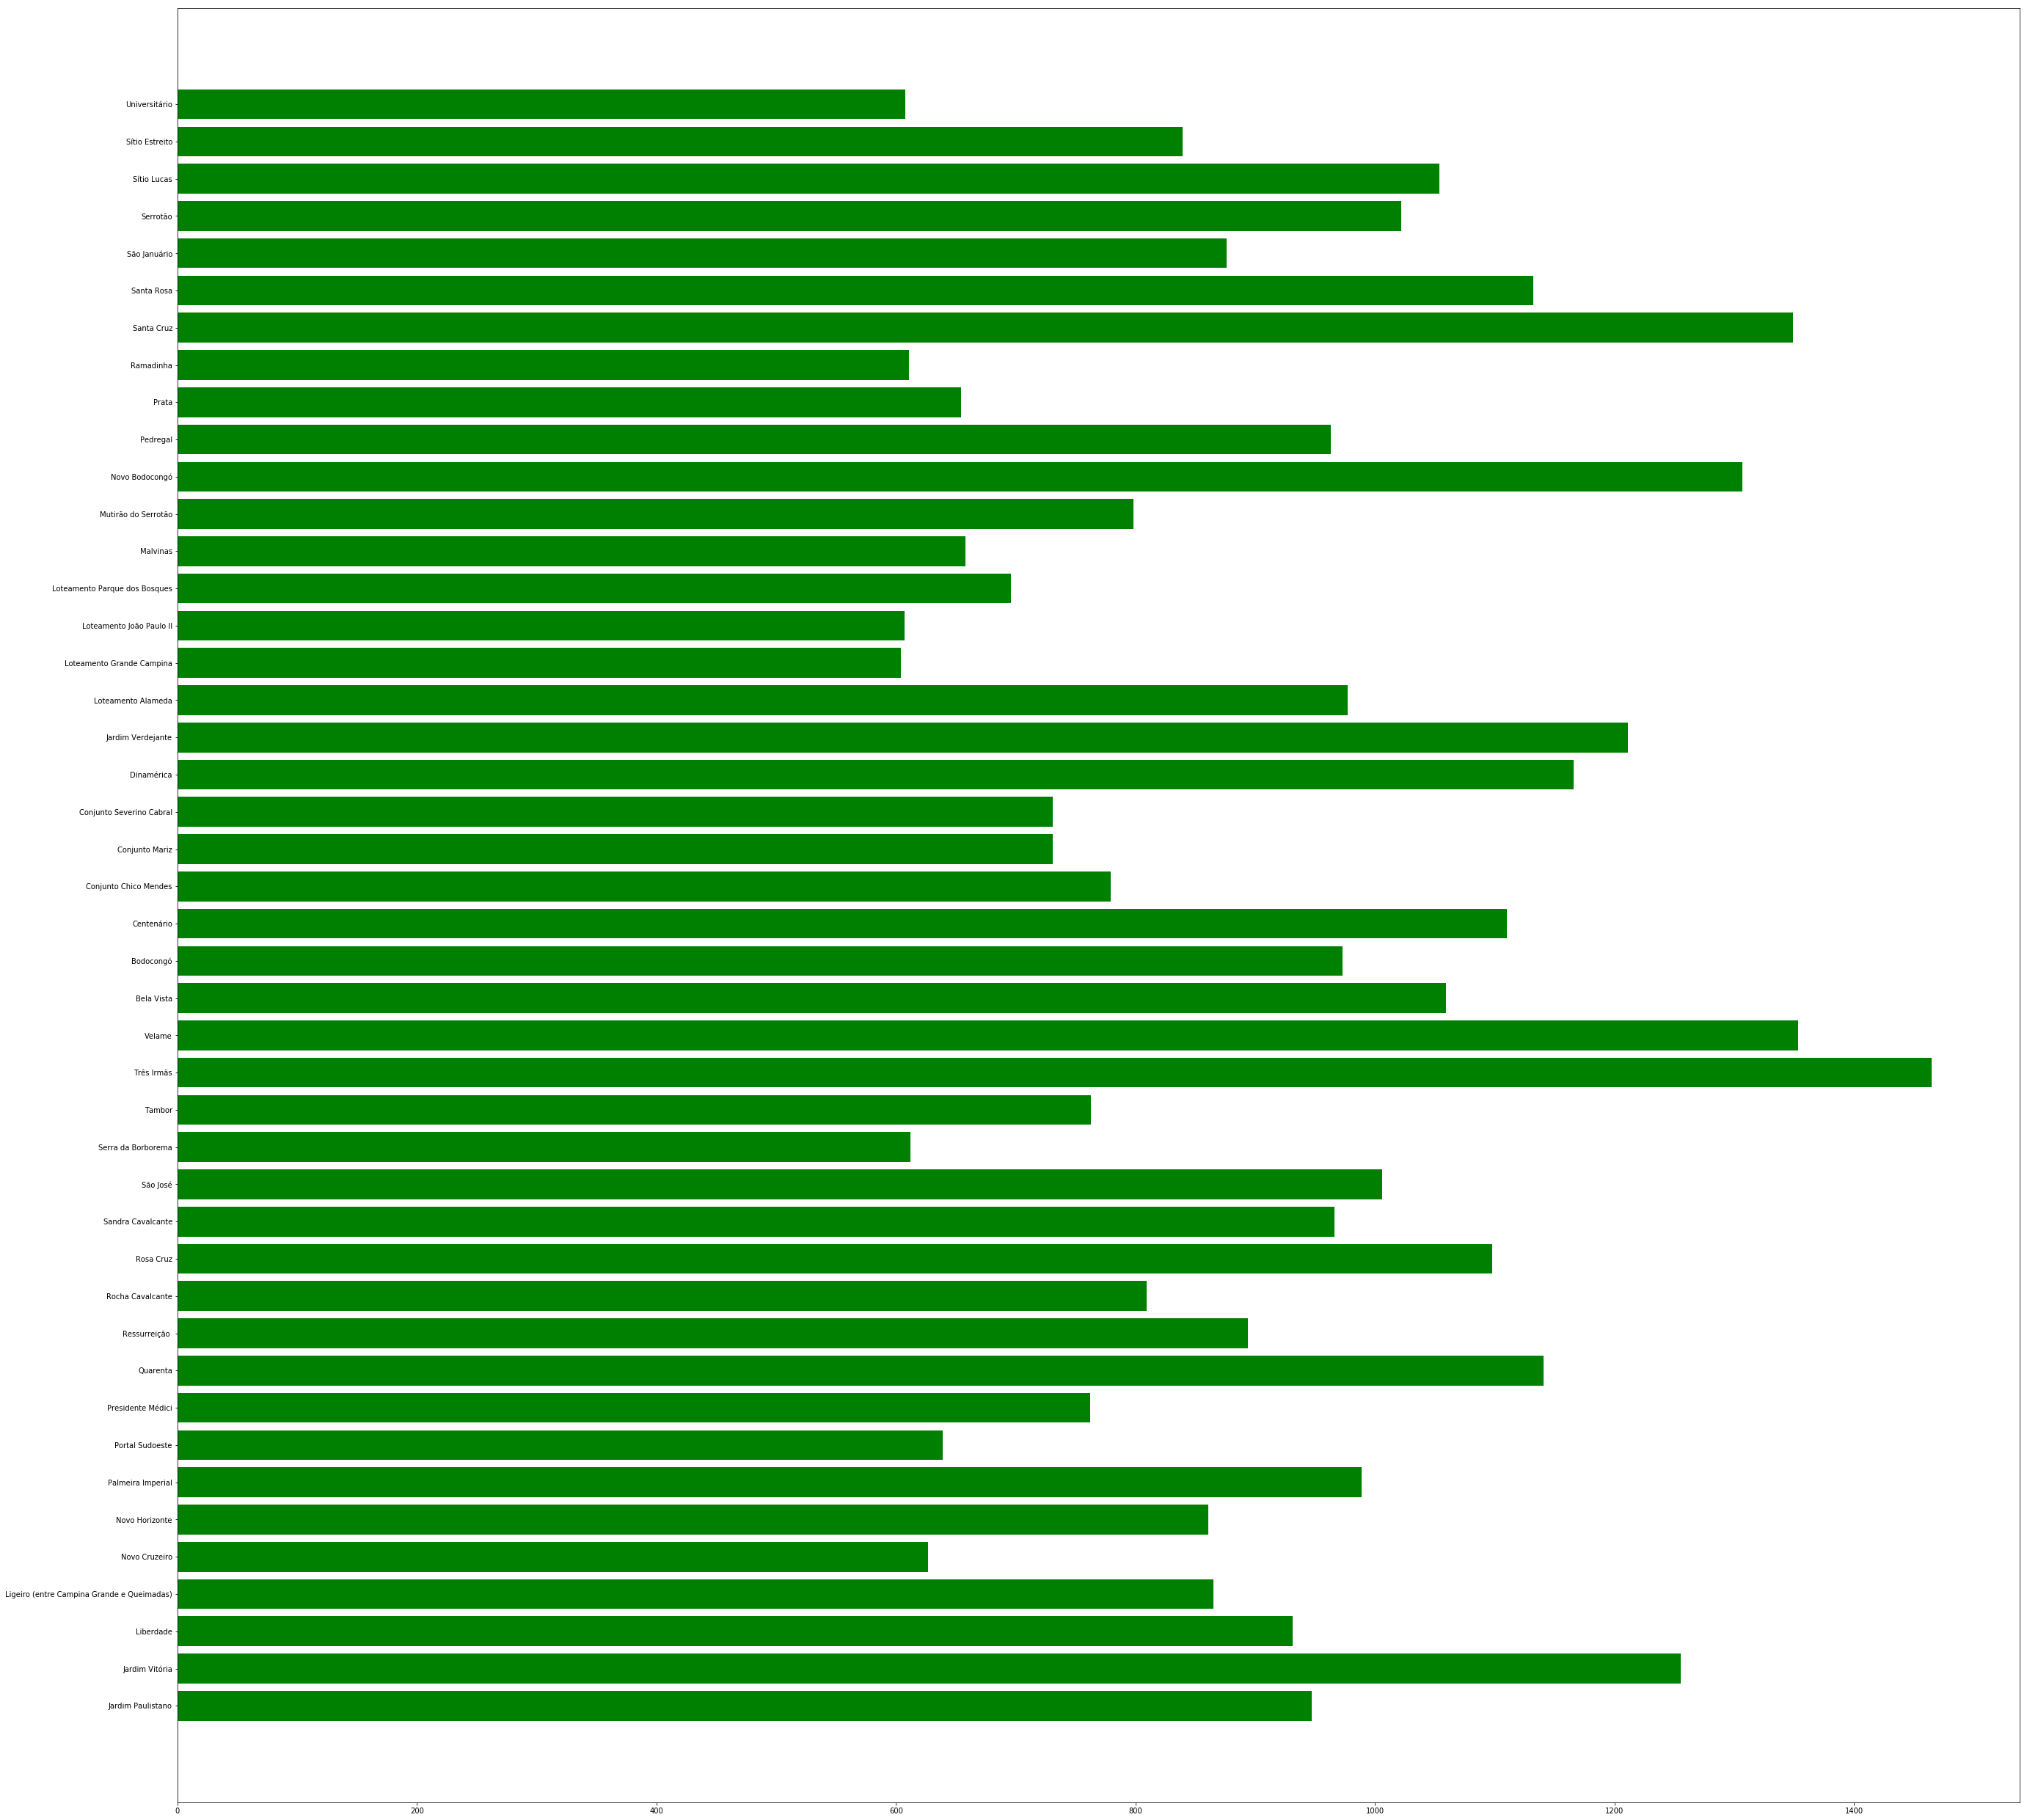

In [29]:
plt.figure(figsize=(45, 45))
valores_par2 = pd.DataFrame({'Bairros': tab['Bairros'][46:90], 'Valor Viajem': valor[45:89]})
plt.barh(valores_par2['Bairros'], valores_par2['Valor Viajem'], color = 'green')

In [31]:
tab2 = pd.read_csv('Preco de todos os bairros em CG.csv', encoding='latin-1')

In [33]:
lista_max = []
for i in tab2:
    if i != 'Bairros':
        count = 0
        for j in range(len(tab2)):
            if type(tab2[i][j]) == float:
                pass
            else:
                ini = 3
                if(tab2[i][j][ini] == '-'):
                    ini = 4
                    val = tab2[i][j][ini:10]
                    numero = int(val)
                    count += numero
                else:
                    ini = 5
                    val = tab2[i][j][ini:8]
                    numero = int(val)
                    count += numero
        lista_max.append(count)

In [35]:
lista_max

[1029,
 870,
 1028,
 1199,
 1037,
 1036,
 1454,
 1090,
 1814,
 1014,
 1387,
 1314,
 1275,
 931,
 1091,
 1963,
 1507,
 1275,
 1047,
 1453,
 847,
 1285,
 1321,
 956,
 981,
 1033,
 1039,
 1189,
 1453,
 1040,
 1096,
 1099,
 1466,
 1285,
 1168,
 1501,
 3863,
 1297,
 1657,
 853,
 1073,
 1406,
 1517,
 1188,
 1069,
 1253,
 1636,
 1242,
 1158,
 858,
 1147,
 1288,
 866,
 1002,
 1497,
 1208,
 1092,
 1451,
 1141,
 1329,
 841,
 1000,
 1874,
 1754,
 1391,
 1280,
 1445,
 1067,
 951,
 951,
 1522,
 1590,
 1287,
 828,
 828,
 958,
 878,
 1054,
 1703,
 1275,
 895,
 836,
 1748,
 1475,
 1170,
 1342,
 1396,
 1122,
 827,
 1724]

Tabela com os preços máximo total, em reais, de viagens entre todos os bairros. Mostrando quais bairros procorcionaram viajens mais caras 

In [37]:
datapar1 = pd.DataFrame({'bairros': tab2['Bairros'][0:46], 'Valor de viajens': lista_max[0:46]})
datapar1

,bairros,Valor de viajens
0,Alto Branco,1029
1,Alto da Serra,870
2,Araxá,1028
3,Bairro das Nações,1199
4,Conceição,1037
5,Cuités,1036
6,Distrito de Jenipapo (dividido entre Campina G...,1454
7,Jardim Continental,1090
8,Jardim Menezes,1814
9,Jardim Tavares,1014


<BarContainer object of 46 artists>

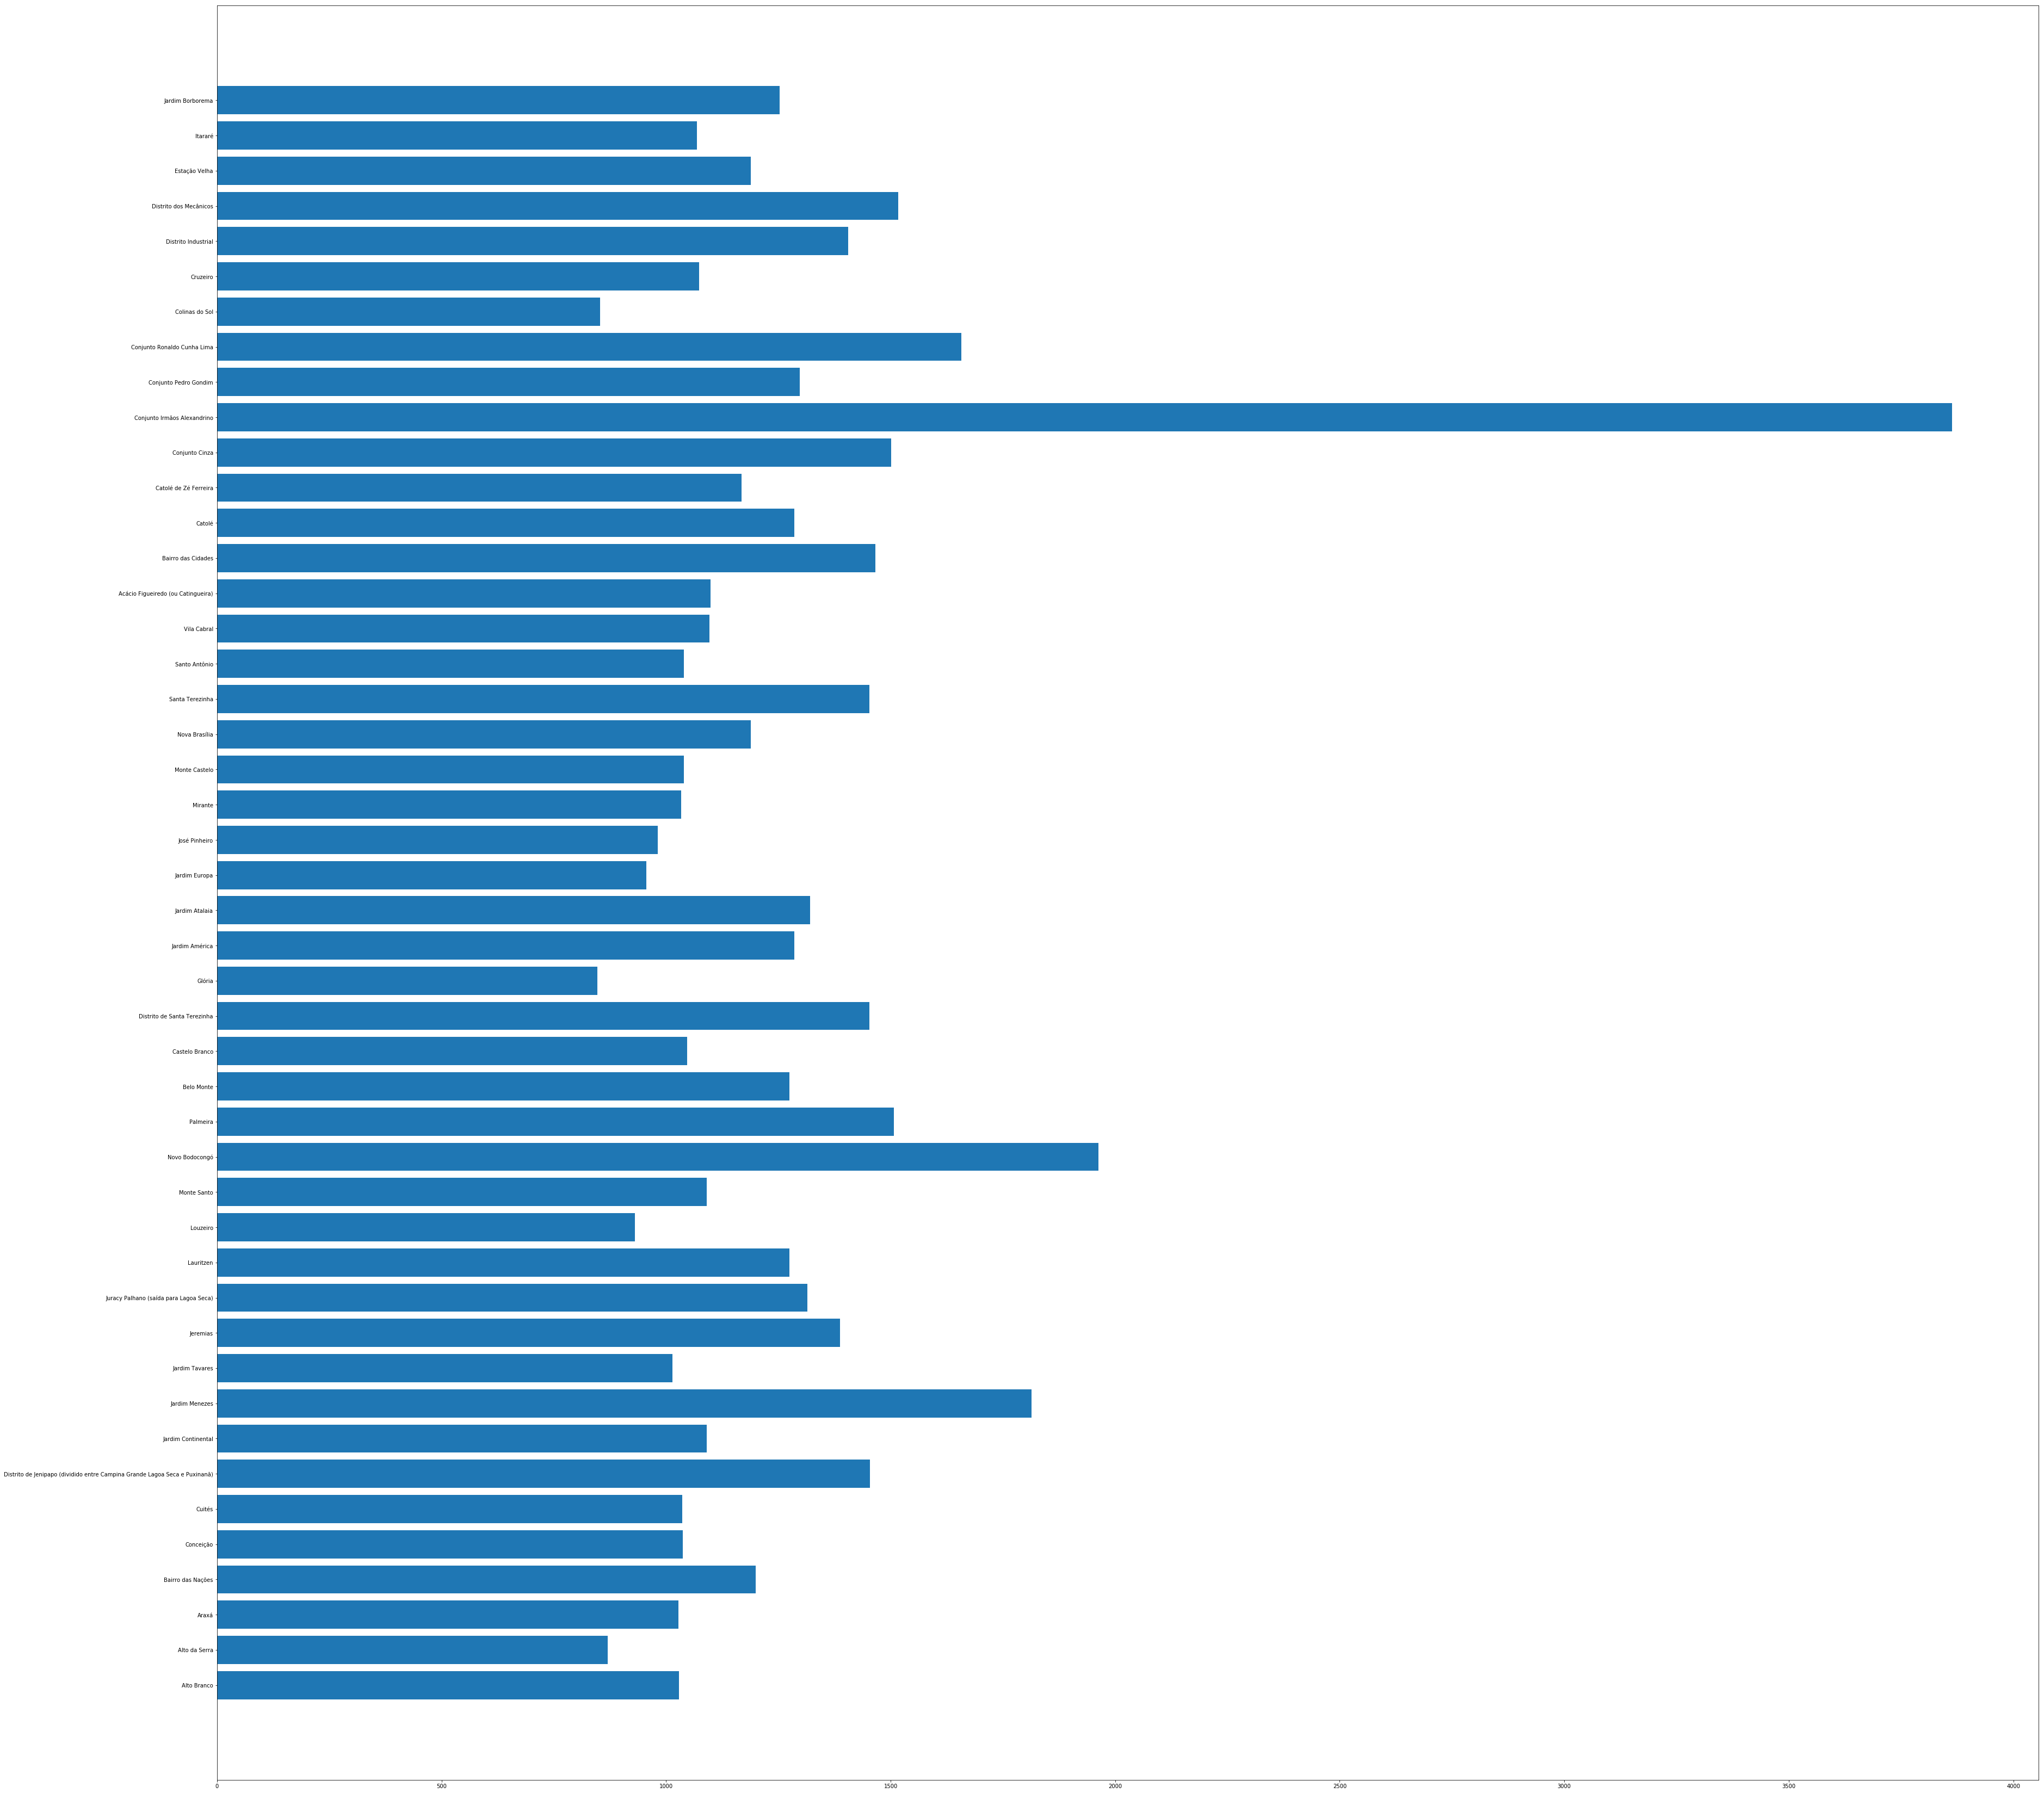

In [39]:
plt.figure(figsize=(60, 60))
plt.barh(datapar1['bairros'], datapar1['Valor de viajens'])

In [41]:
datapar2 = pd.DataFrame({'bairros': tab2['Bairros'][46:90], 'Valor de viajens': lista_max[46:90]})
datapar2

,bairros,Valor de viajens
46,Jardim Paulistano,1636
47,Jardim Vitória,1242
48,Liberdade,1158
49,Ligeiro (entre Campina Grande e Queimadas),858
50,Novo Cruzeiro,1147
51,Novo Horizonte,1288
52,Palmeira Imperial,866
53,Portal Sudoeste,1002
54,Presidente Médici,1497
55,Quarenta,1208


<BarContainer object of 44 artists>

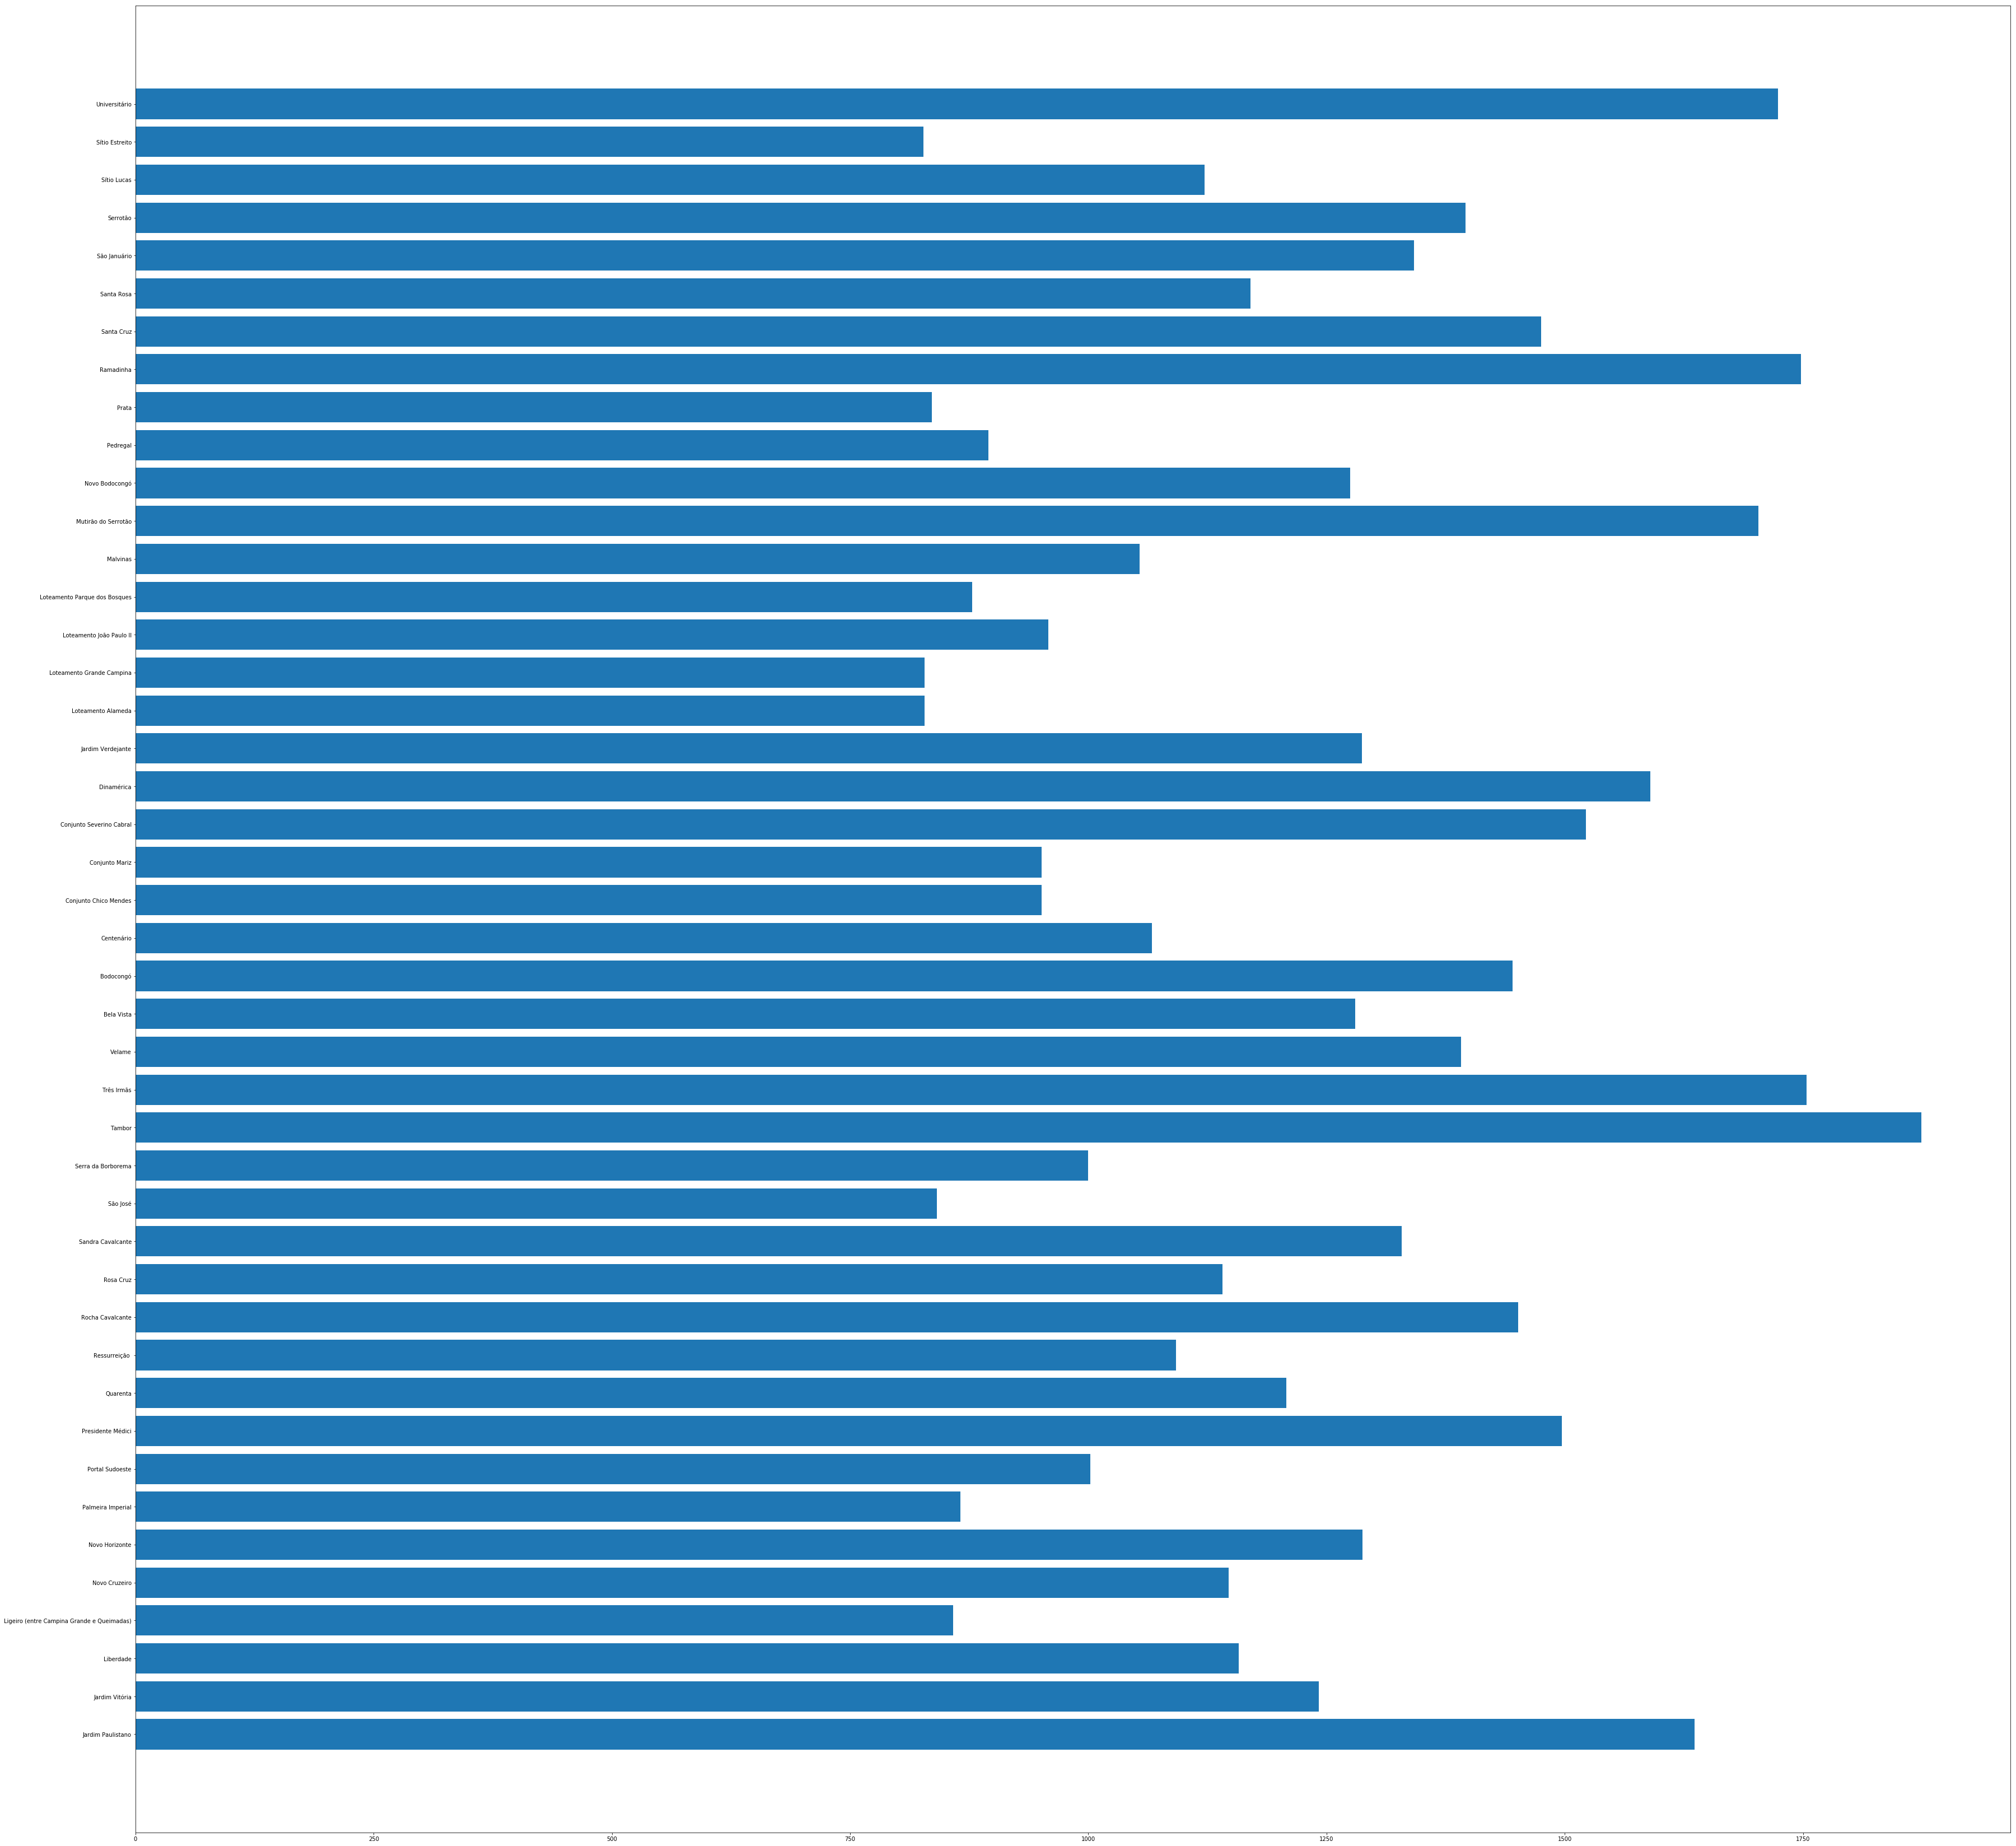

In [42]:
plt.figure(figsize=(60, 60))
plt.barh(datapar2['bairros'], datapar2['Valor de viajens'])